# Disease Classification using Machine Learning

# Table of Contents

1. [Introduction](#Introduction)
    - [Overview of the Dataset](#Overview-of-the-Dataset)
    - [Objectives of the Analysis](#Objectives-of-the-Analysis)
2. [Data Loading](#Data-Loading)
    - [Importing Libraries](#Importing-Libraries)
    - [Loading the Dataset](#Loading-the-Dataset)
3. [Data Inspection](#Data-Inspection)
    - [Initial Data Exploration](#Initial-Data-Exploration)
    - [Overview of Dataset](#Overview-of-Dataset)
    - [Data Information](#Data-Information)
    - [Missing Values](#Missing-Values)
    - [Analyzing Prognosis Distribution for Potential Class Imbalance](#class-imbalance-analysis)
    - [Summary Statistics](#Summary-Statistics)
4. [Data Transformation for Symptom Analysis](#Data-Transformation-for-Sympton-Analysis)
5. [Data Visualization](#Data-Visualization)
    - [Symptom Frequency Distribution](#Sympton-Frequency-Distribution)
    - [Symptom Count Category](#Symptom-Count-Category)
    - [Correlation Heatmap](#Correlation-Heatmap)
    - [Correlation between Symptoms and Disease](#Correlation-between-Symptoms-and-Disease)
    - [Pairplot for top correlated symptoms](#Pairplot-for-top-correlated-symptoms)

# Introduction
<a id="Introduction"></a>

## Overview of the Dataset
<a id="Overview-of-the-Dataset"></a>
In this project, we aim to predict the disease by analyzing different symptoms a person experiences, this is captured in the last column name 'prognosis'. We have around 132 parameters on which 42 different types of diseases can be predicted. 


## Objectives of the Analysis
<a id="Objectives-of-the-Analysis"></a>
The primary objective of this project is to develop a machine-learning model that can accurately classify and cluster diseases based on patient's symptoms. This can be used to a helping tool for medical staff to help patients all around the world. Best features should be identifies while creating of the ML model.

### Data Loading


##### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from mpl_toolkits import mplot3d 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

##### Loading the Dataset


In [2]:
train_data = pd.read_csv("../data/raw/Training.csv")
test_data = pd.read_csv("../data/raw/Testing.csv")

#### Creating image folder

In [3]:
# Define the file path to save the image
image_folder = "../images"
# Check if the image folder exists, if not, create it
if not os.path.exists(image_folder):
    os.makedirs(image_folder)

# Data Inspection
<a id="Data-Inspection"></a>
## Initial Data Exploration
<a id="Initial-Data-Exploration"></a>


We will inspect the first few columns of the dataset to gather some information at a glance.

In [4]:
# Initial data exploration train data
print("\n=== Initial Data Exploration ===")
print("First 5 rows of the train dataset:")
train_data.head()


=== Initial Data Exploration ===
First 5 rows of the train dataset:


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


The data seems to come in binary format for each variable. 1 indicates the presence of a symptom, while 0 indicates its absence. There are two columns we want to get rid of:

- **fluid_overload:** Contains all 0s as values. Duplicated as fluid_overload.1, which will be retained in the dataset.
- **Unnamed:** 133: Blank final column of the dataset, contains no information so it will be removed.

In [5]:
# replacing the data with the columns we actually want 
train_data = train_data[train_data.columns.difference(['Unnamed: 133', 'fluid_overload']).tolist()]

train_data.head()



,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Save to processed directory
train_data.to_csv("../data/processed/Training_processed.csv", index=False)

Similary deleting fluid_overload from test dataset.

In [22]:
test_data = test_data[test_data.columns.difference(['fluid_overload']).tolist()]

print("First 5 rows of the test dataset:")
test_data.head()


First 5 rows of the test dataset:


,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Save to processed directory
test_data.to_csv("../data/processed/Testing_processed.csv", index=False)

## Overview of Dataset
<a id="Overview-of-Dataset"></a>

In [9]:
# Overview of the dataset
print("=== Dataset Overview ===")
print(f"The training dataset has a shape of {train_data.shape}, which can be broken down into a total of {train_data.shape[0]} rows and {train_data.shape[1]} columns. \nThis means that there are {train_data.shape[1] - 1} predictor variables. \nWithin the prognosis column, there are {len(train_data['prognosis'].unique())} diseases included.")

=== Dataset Overview ===
The training dataset has a shape of (4920, 132), which can be broken down into a total of 4920 rows and 132 columns. 
This means that there are 131 predictor variables. 
Within the prognosis column, there are 41 diseases included.


## Data Information
<a id="Data-Information"></a>

In [10]:
# Display the info of the training dataset
print("\n=== Dataset Info ===")
print(train_data.info())


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 132 entries, abdominal_pain to yellowish_skin
dtypes: int64(131), object(1)
memory usage: 5.0+ MB
None


In [11]:
print("\nColumn names and their data types:")
dtypes = pd.DataFrame(train_data.dtypes, columns=['Data Type'])
dtypes.index.name = 'Column Name'
dtypes.groupby('Data Type').size().to_frame()


Column names and their data types:


,0
Data Type,
int64,131
object,1


## Missing Values
<a id="Missing-Values"></a>

In [12]:
# Check for missing values
missing_values = train_data.isnull().sum()

# Check if there are any missing values
if missing_values.sum() > 0:
    print("Missing values found in the following columns:")
    print(missing_values[missing_values > 0])  # Print only columns with missing values
else:
    print("No missing values found.")

No missing values found.


## Analyzing Prognosis Distribution for Potential Class Imbalance
<a id="class-imbalance-analysis"></a>

In [13]:
# Get unique prognosis values
print("\n=== Unique Values Analysis ===")
unique_prognosis = train_data["prognosis"].unique()
print("Unique prognosis values:")
print(unique_prognosis)
    
# Analyze prognosis distribution for class imbalance
print("\n=== Prognosis Distribution Analysis ===")
prognosis_counts = train_data["prognosis"].value_counts()
prognosis_percentage = train_data["prognosis"].value_counts(normalize=True) * 100
    
print("\nPrognosis counts (absolute):")
print(prognosis_counts)
print("\nPrognosis percentage distribution:")
print(prognosis_percentage)
    
# Check for class imbalance
print("\nClass imbalance analysis:")
max_class_percentage = prognosis_percentage.max()
min_class_percentage = prognosis_percentage.min()
print(f"Most common class percentage: {max_class_percentage:.2f}%")
print(f"Least common class percentage: {min_class_percentage:.2f}%")
if max_class_percentage / min_class_percentage > 2:
    print("Potential class imbalance detected.")
else:
    print("No significant class imbalance detected.")


=== Unique Values Analysis ===
Unique prognosis values:
['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']

=== Prognosis Distribution Analysis ===

Prognosis counts (absolute):
prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tu

<Axes: xlabel='prognosis'>

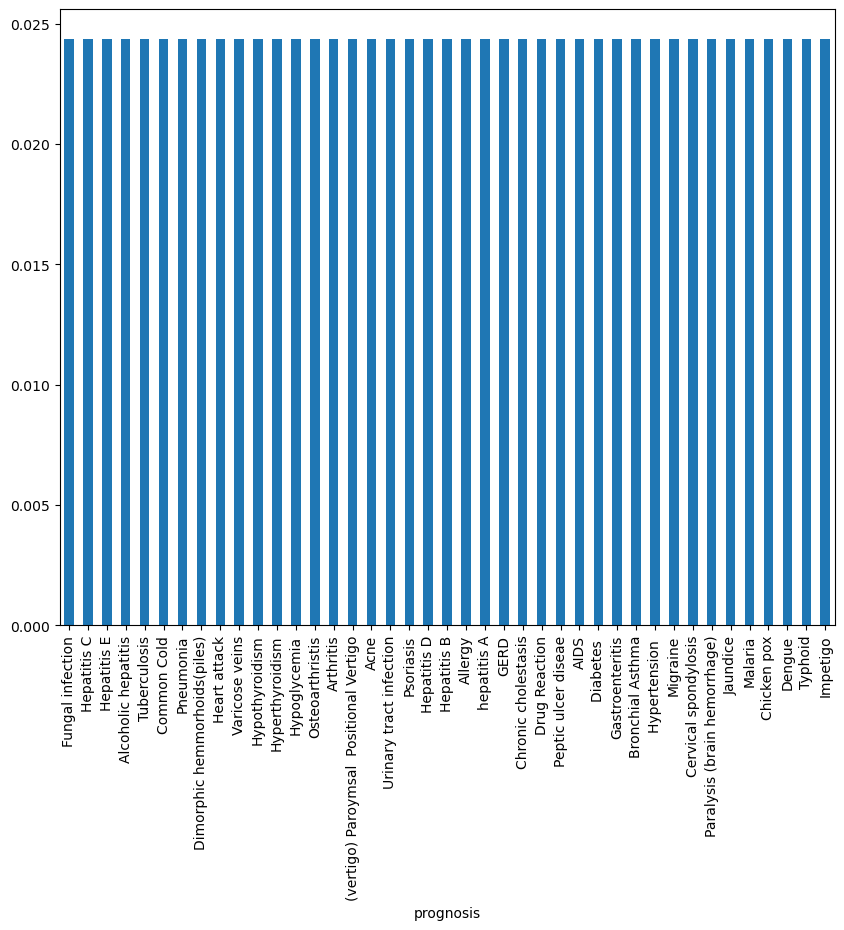

In [14]:
train_data['prognosis'].value_counts(normalize=True).plot(kind='bar', figsize=(10,8))

According to the plot, the available classes within the prognosis dataset are evenly distributed.

## Summary Statistics
<a id="Summary-Statistics"></a>


As each predictor column is encoded in binary format, we do not expect the summary statistics for the columns to provide meaningful insights. The minimum and maximum values will remain 0 and 1 respectively, while the means and standard deviations are generally not meaningful in the context of building a model.

# Data Transformation for Symptom Analysis
<a id="Data-Transformation-for-Sympton-Analysis"></a>


In [15]:
def process_melted_data():
    # Ensure 'prognosis' column is formatted for readability
    train_data['prognosis'] = train_data['prognosis'].str.title() 

    # Get all columns except 'prognosis'
    value_columns = train_data.columns.difference(['prognosis']).tolist()
    
    # Melt the dataset based on the 'prognosis' column and value_columns
    melted_train_data = train_data.melt(id_vars=['prognosis'], value_vars=value_columns, var_name='variable', value_name='value')

    # Debugging: Print the structure of melted_train_data
    # print(melted_train_data.head())
    # print(melted_train_data.columns)
    
    # Group by 'prognosis' and 'variable', and sum the 'value'
    melted_train_data = (
        melted_train_data.groupby(['prognosis', 'variable'], as_index=False)
        .sum('value')
        .query('value > 0')
        .reset_index(drop=True)
    )

    # Convert 'prognosis' and 'variable' to categorical for efficient processing
    melted_train_data['prognosis'] = melted_train_data['prognosis'].astype('category')
    melted_train_data['variable'] = melted_train_data['variable'].astype('category')
    
    # Return the processed data
    return melted_train_data

melted_train_data = process_melted_data()

# Display the head to verify output
melted_train_data.head()


,prognosis,variable,value
0,(Vertigo) Paroymsal Positional Vertigo,headache,114
1,(Vertigo) Paroymsal Positional Vertigo,loss_of_balance,114
2,(Vertigo) Paroymsal Positional Vertigo,nausea,114
3,(Vertigo) Paroymsal Positional Vertigo,spinning_movements,108
4,(Vertigo) Paroymsal Positional Vertigo,unsteadiness,114


In [16]:
# Save melted data to processed directory
melted_train_data.to_csv("../data/processed/melted_train_data.csv")

# Data Visualization
<a id="Data-Visualization"></a>

## Symptom Frequency Distribution
<a id="Sympton-Frequency-Distribution"></a>

The image already exists in the specified folder.


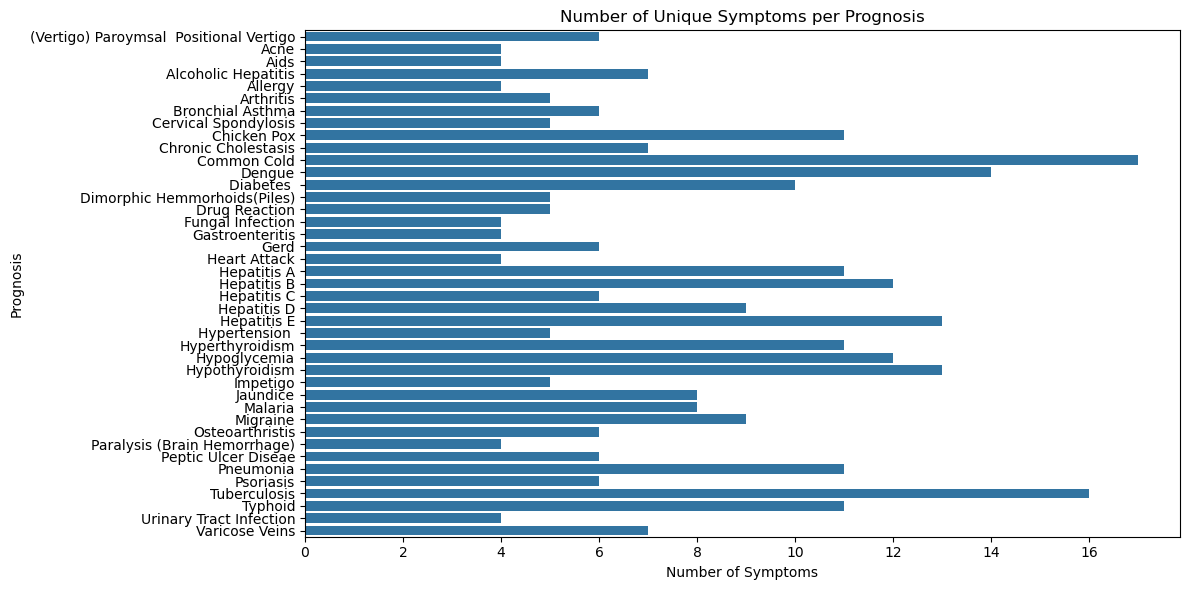

In [17]:
image_path_1 = os.path.join(image_folder, "unique_symptoms_per_prognosis.png")

symptom_counts = melted_train_data.groupby('prognosis', observed=True)['variable'].nunique().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=symptom_counts.values, y=symptom_counts.index)
plt.title('Number of Unique Symptoms per Prognosis')
plt.xlabel('Number of Symptoms')
plt.ylabel('Prognosis')
plt.tight_layout()

if not os.path.isfile(image_path_1):
    # Save the plot
    plt.savefig(image_path_1, dpi=300)
else:
    print("The image already exists in the specified folder.")
plt.show()

## Symptom Count Category
<a id="Sympton-Count-Category"></a>

The image already exists in the specified folder.


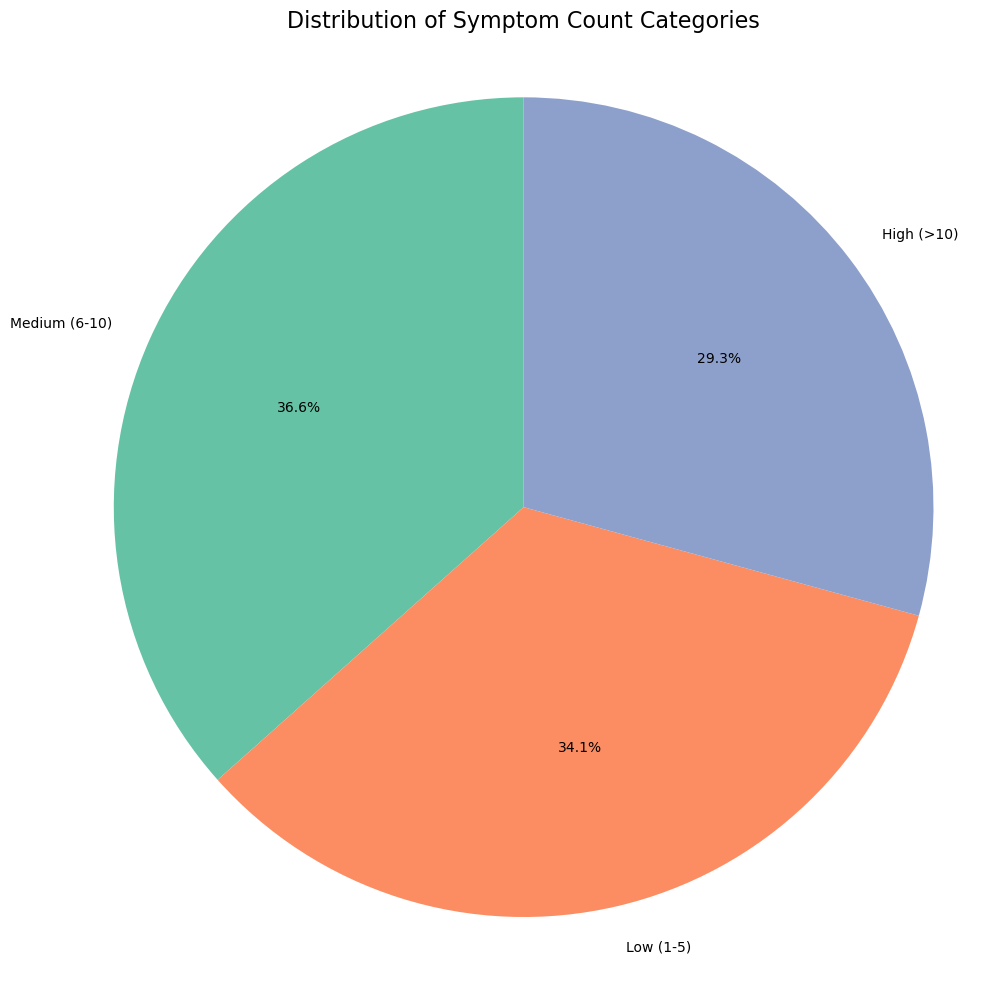

In [18]:
image_path_2 = os.path.join(image_folder, "symptom_count_category.png")

# Pie Chart of Symptom Count Categories
def categorize_count(count):
    if count <= 5:
        return 'Low (1-5)'
    elif count <= 10:
        return 'Medium (6-10)'
    else:
        return 'High (>10)'

symptom_counts_df = pd.DataFrame({'count': symptom_counts})
symptom_counts_df['category'] = symptom_counts_df['count'].apply(categorize_count)
category_counts = symptom_counts_df['category'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title('Distribution of Symptom Count Categories', fontsize=16)
plt.axis('equal')
plt.tight_layout()
if not os.path.isfile(image_path_2):
    plt.savefig(image_path_2, dpi=300, bbox_inches='tight')
else:
    print("The image already exists in the specified folder.")
plt.show()

## Correlation Heatmap
<a id="Correlation-Heatmap"></a>

The image already exists in the specified folder.


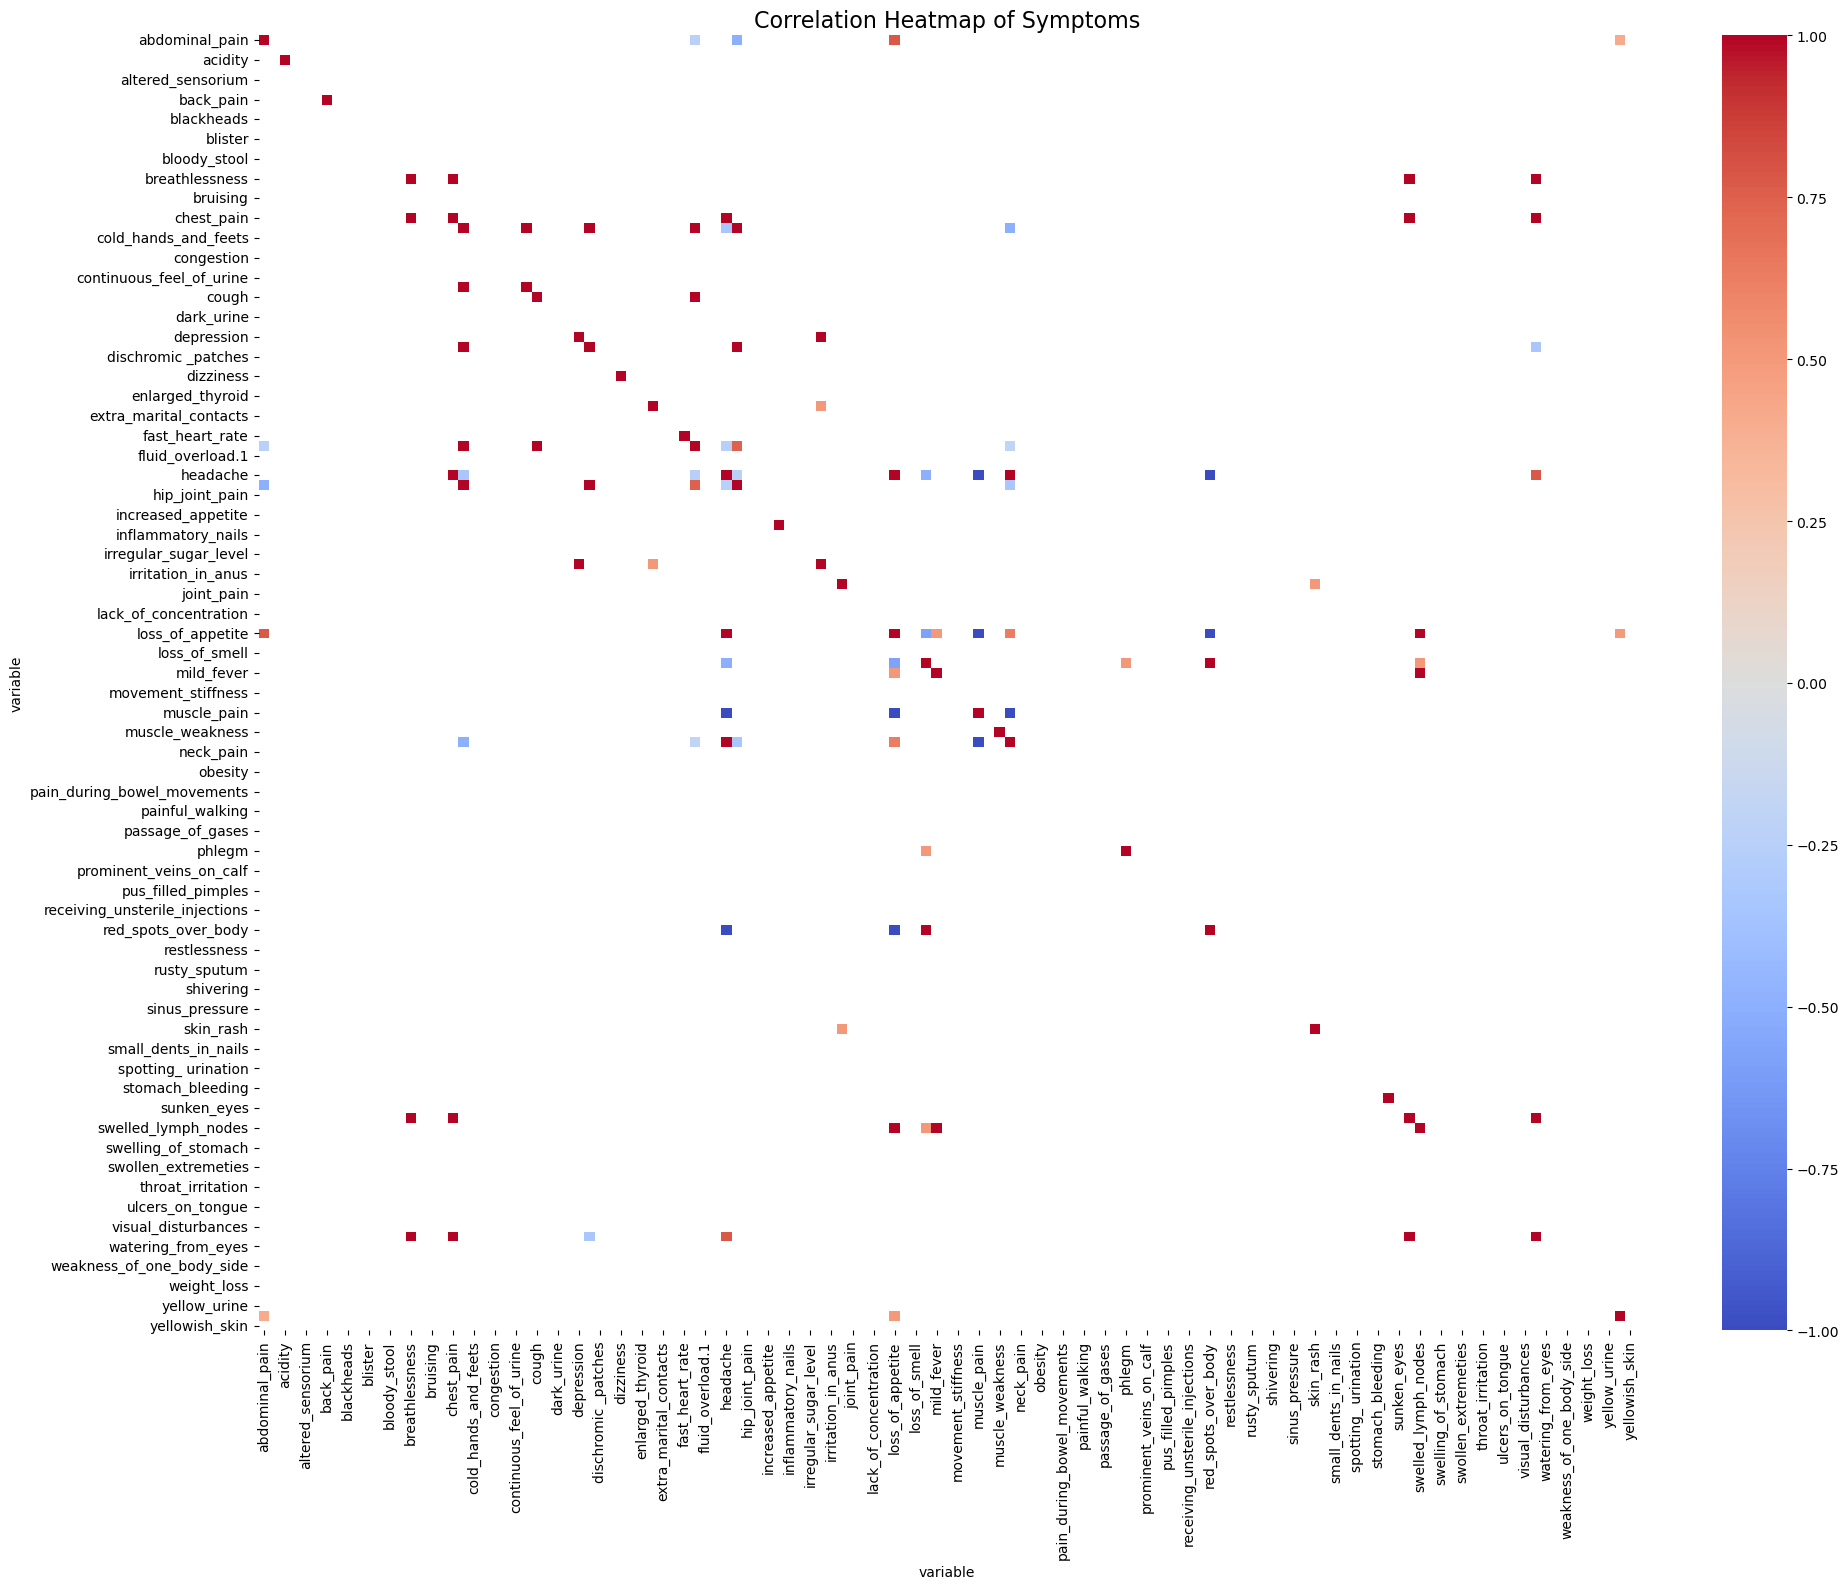

In [19]:
image_path_3 = os.path.join(image_folder, "symptom_heatmap.png")

pivot_data = melted_train_data.pivot(index='prognosis', columns='variable', values='value')
correlation_matrix = pivot_data.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Heatmap of Symptoms', fontsize=16)
plt.tight_layout()
if not os.path.isfile(image_path_3):
    plt.savefig(image_path_3, dpi=300, bbox_inches='tight')
else:
    print("The image already exists in the specified folder.")
plt.show()

## Correlation between Symptoms and Disease
<a id="Correlation-between-Symptoms-and-Disease"></a>

In [20]:
# Correlation Analysis - Encoding and Correlation
train_data['prognosis'] = train_data['prognosis'].str.title()
le = LabelEncoder()
train_data['disease_encoded'] = le.fit_transform(train_data['prognosis'])
train_data['disease_encoded'] = train_data['disease_encoded'].astype(float)

In [21]:
# Selecting numeric columns
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_data.corr()
correlations = corr_matrix['disease_encoded'].sort_values(ascending=False)

In [22]:
# Correlation of all features with the target column (disease)
correlations = corr_matrix['disease_encoded'].sort_values(ascending=False)
print("\nCorrelation between Symptoms and Disease:")
correlations


Correlation between Symptoms and Disease:


Column Name
disease_encoded            1.000000
sweating                   0.290340
cramps                     0.260331
bruising                   0.260331
prominent_veins_on_calf    0.260331
                             ...   
pus_filled_pimples        -0.240568
blackheads                -0.240568
scurring                  -0.240568
spinning_movements        -0.253230
unsteadiness              -0.260331
Name: disease_encoded, Length: 132, dtype: float64

/var/folders/vc/zgsxldz91bb2k381f029lrxm0000gn/T/ipykernel_7147/2301152114.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=significant_correlations.values, y=significant_correlations.index, palette='viridis')


The symptom-disease correlation bar chart already exists.


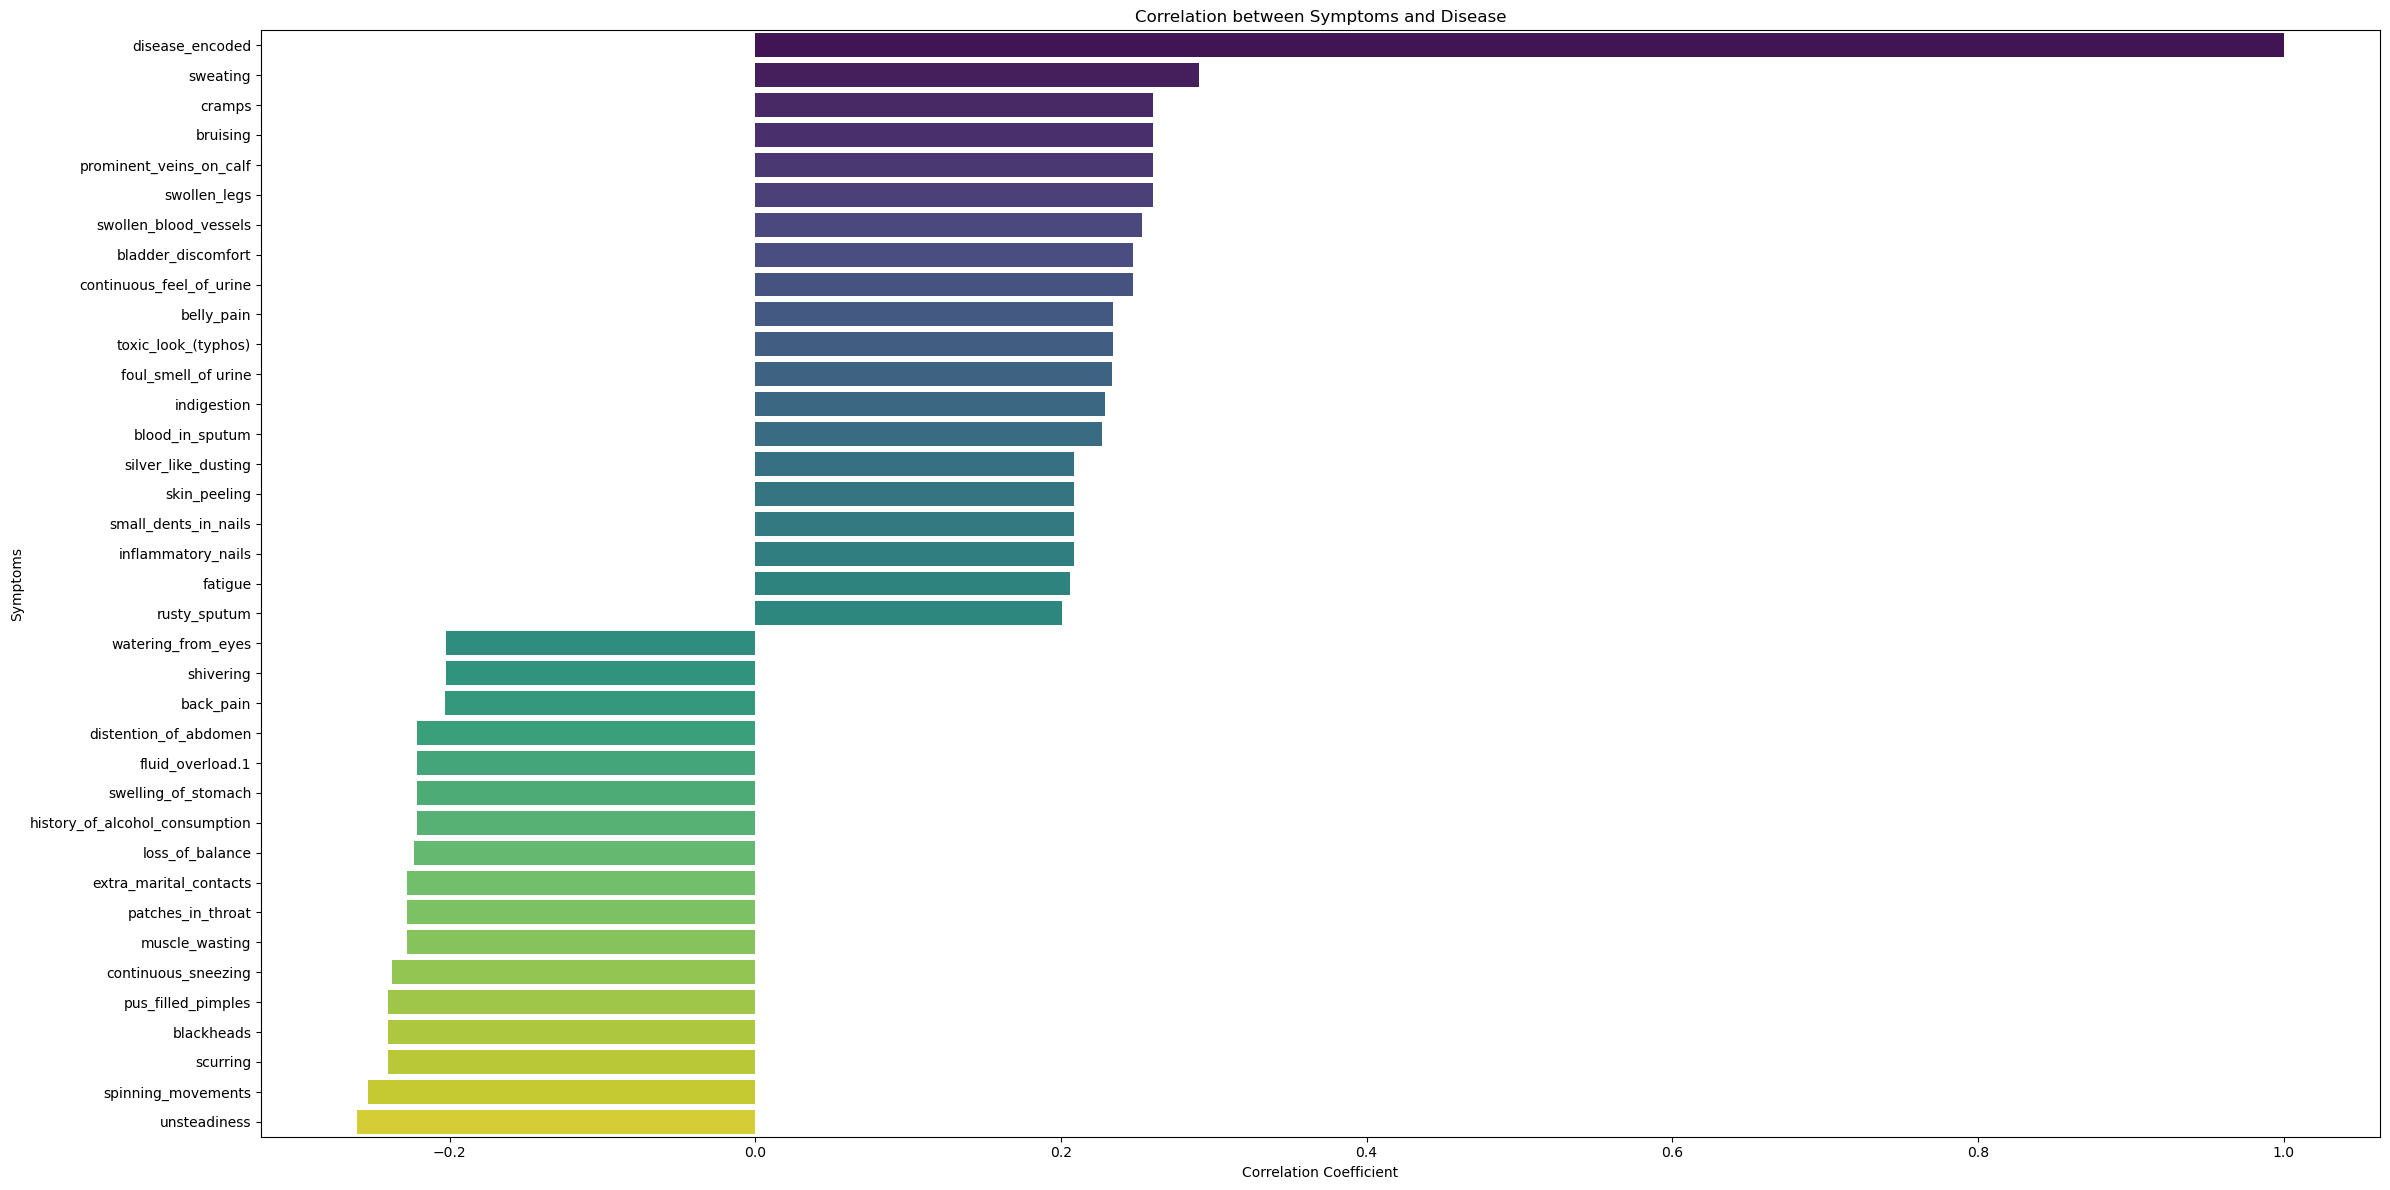

In [23]:
# Plotting significant correlations bar chart if not already saved
image_path_4 = os.path.join(image_folder, "symptom_disease_correlation.png")

threshold = 0.2
significant_correlations = correlations[abs(correlations) > threshold]

plt.figure(figsize=(24, 12))
sns.barplot(x=significant_correlations.values, y=significant_correlations.index, palette='viridis')
plt.title("Correlation between Symptoms and Disease")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Symptoms")
plt.tight_layout()
if not os.path.isfile(image_path_4):
    plt.savefig(image_path_4, dpi=300, bbox_inches='tight')
else:
    print("The symptom-disease correlation bar chart already exists.")
plt.show()


The symptom-disease encoded correlation heatmap already exists.


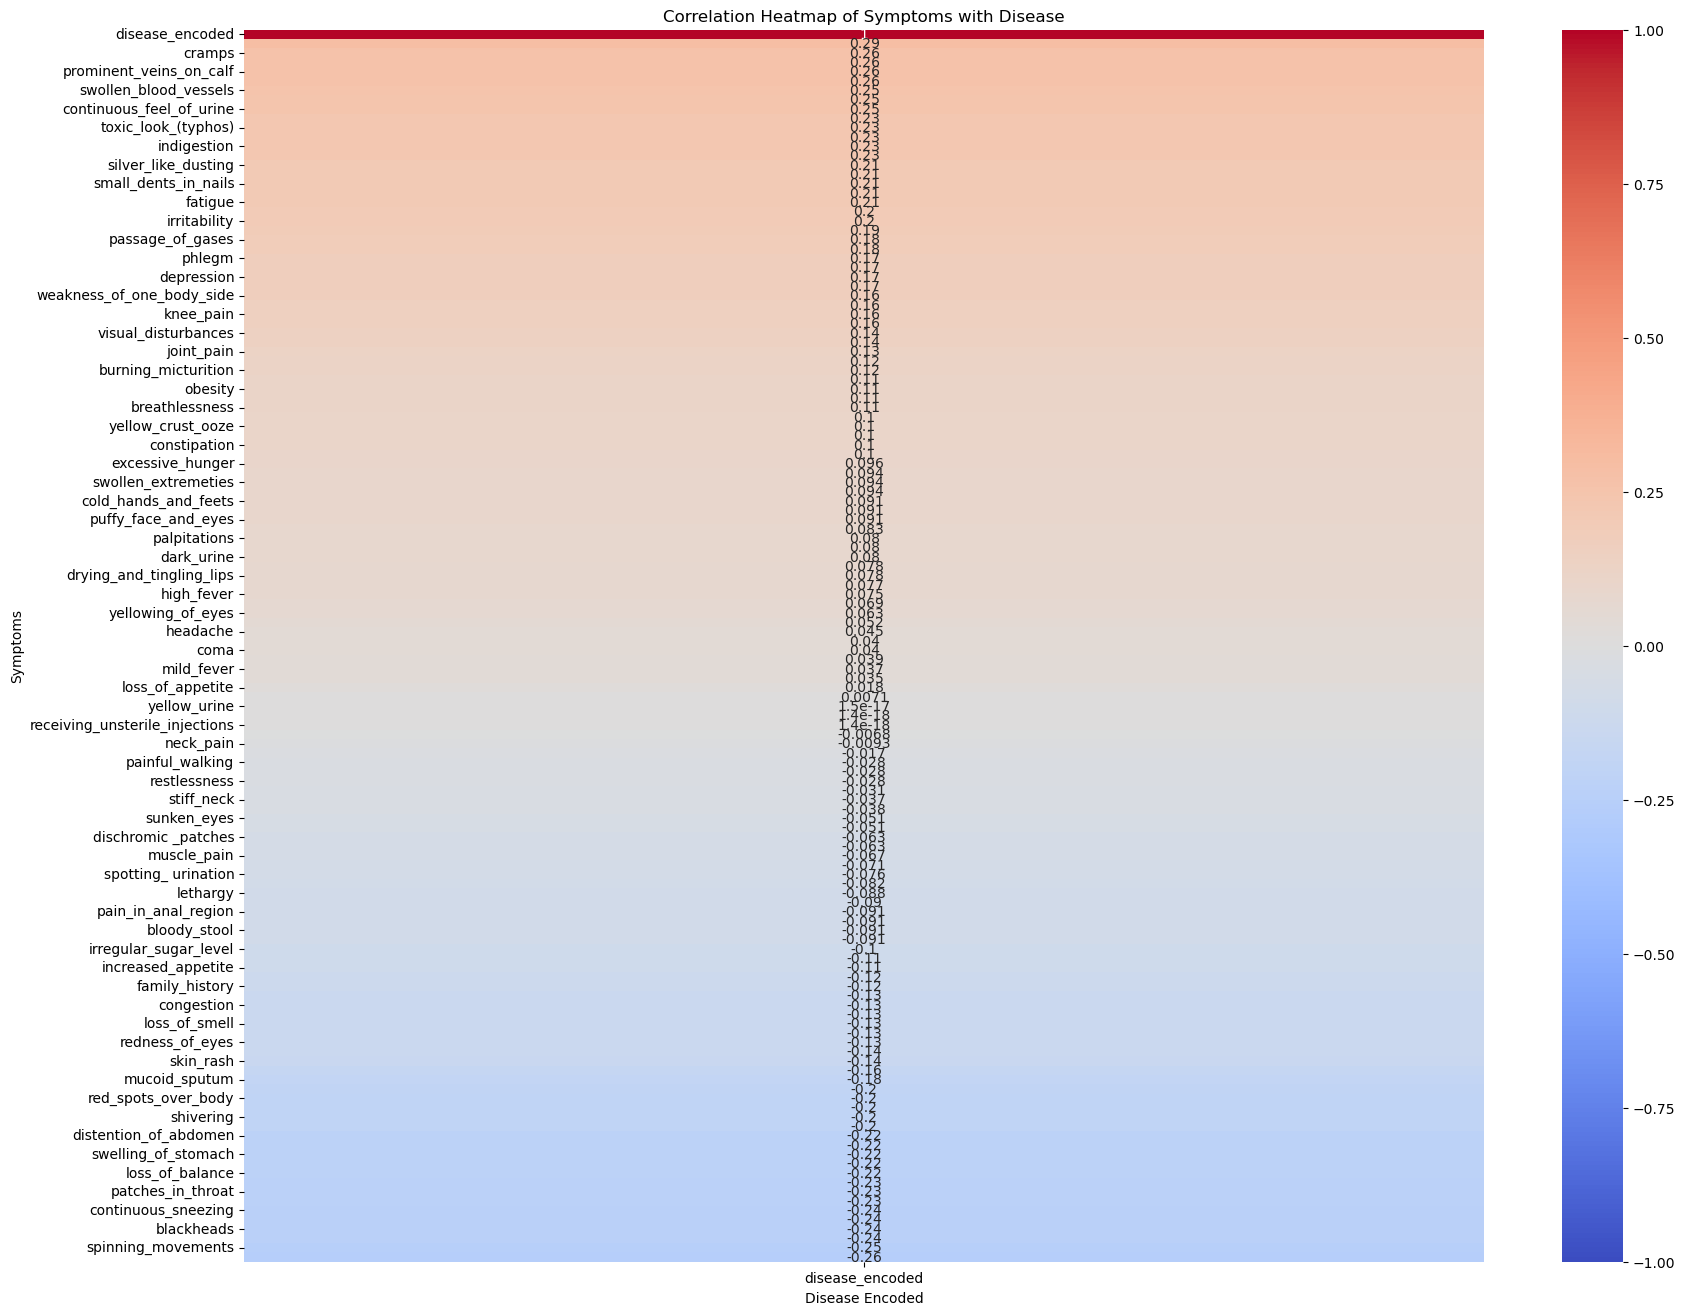

In [24]:
# Plotting the correlation heatmap of symptoms with disease encoding
image_path_5 = os.path.join(image_folder, "symptom_disease_heatmap_encoded.png")

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix[['disease_encoded']].sort_values(by='disease_encoded', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Symptoms with Disease")
plt.xlabel("Disease Encoded")
plt.ylabel("Symptoms")

if not os.path.isfile(image_path_5):
    plt.savefig(image_path_5, dpi=300, bbox_inches='tight')
else:
    print("The symptom-disease encoded correlation heatmap already exists.")
plt.show()



## Pairplot for top correlated symptoms
<a id="Pairplot-for-top-correlated-symptoms"></a>

The pairplot of Selected Symptoms and Prognosis already exists.


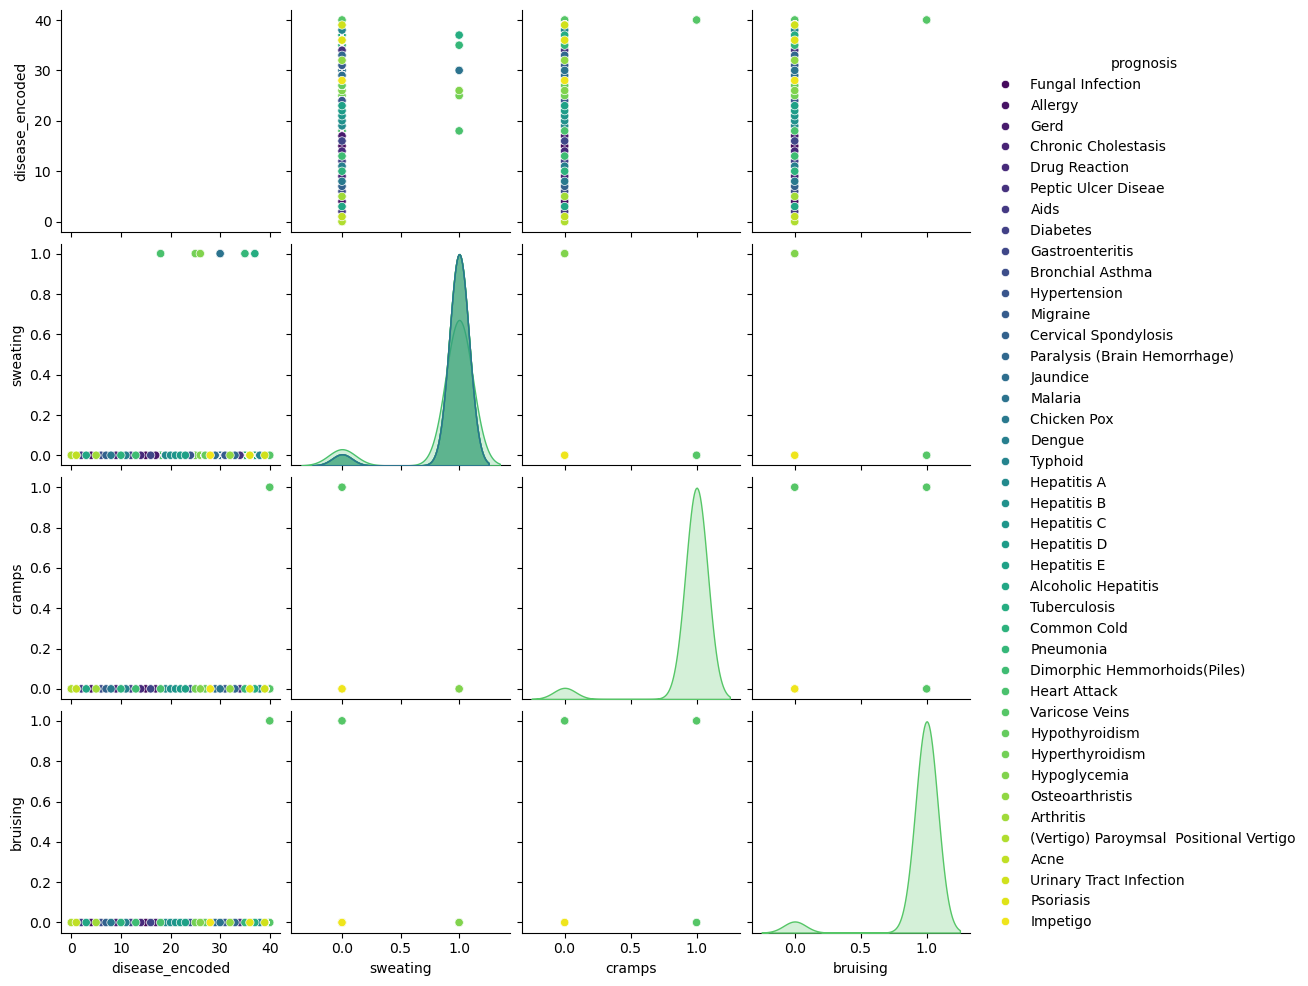

In [25]:
# Selecting top correlated symptoms for pairplot (example: using top 4 based on threshold)

image_path_6 = os.path.join(image_folder, "pairplot_top_4_symptoms_for_prognosis.png")

threshold = 0.2
significant_symptoms = correlations[abs(correlations) > threshold].index.tolist()
sample_symptoms = significant_symptoms[:4]  # Adjust as necessary based on importance

# Pairplot for selected symptoms with respect to prognosis
sns.pairplot(train_data, vars=sample_symptoms, hue="prognosis", palette='viridis', diag_kind="kde")
# plt.title("Pairplot of Selected Symptoms and Prognosis")


if not os.path.isfile(image_path_6):
    plt.savefig(image_path_6, dpi=300, bbox_inches='tight')
else:
    print("The pairplot of Selected Symptoms and Prognosis already exists.")

plt.show()
